In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
data = pd.read_csv("iris.data",header = None)
X = data.iloc[: , 0:4].values
y = data.iloc[: , 4:].values
print(data)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


c:\Users\itsab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

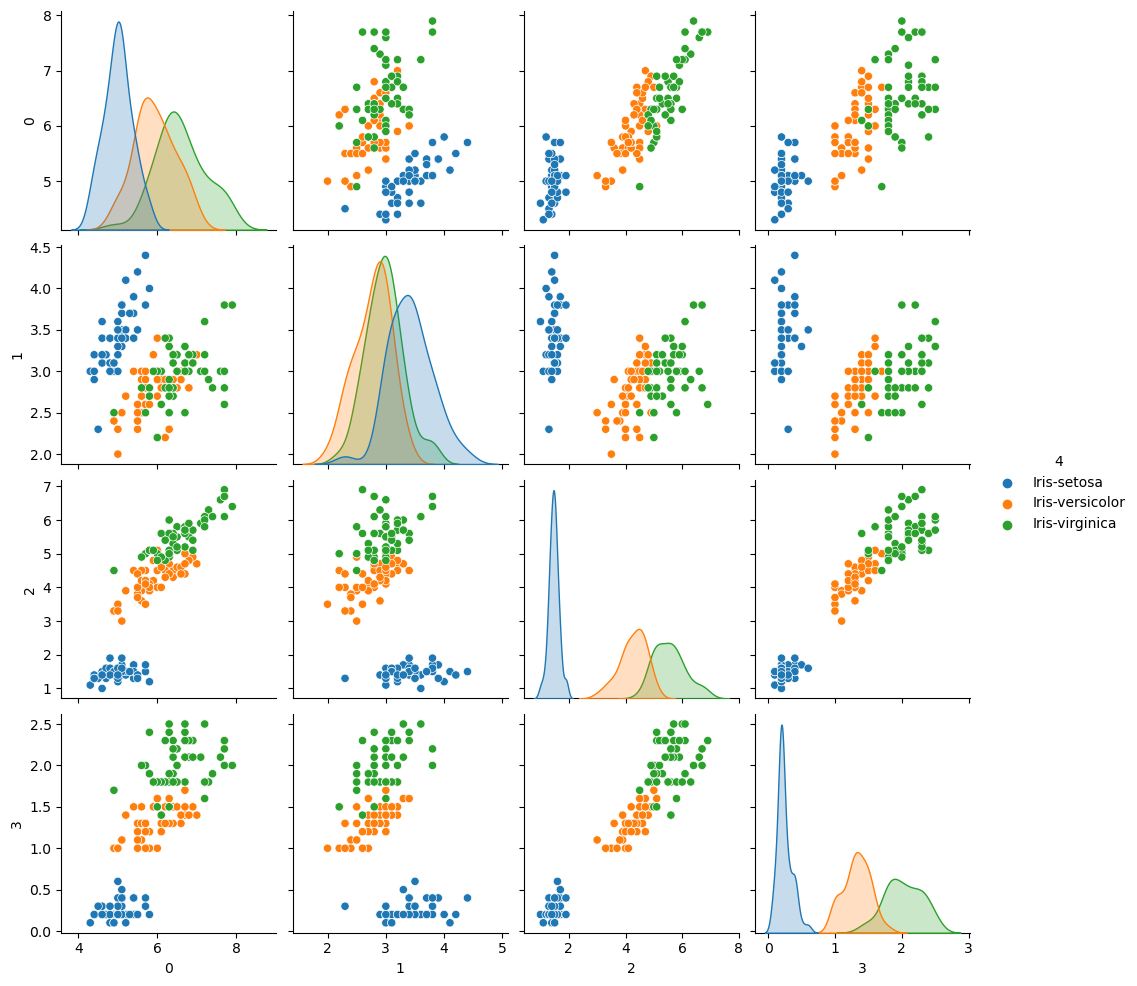

In [13]:
plt.figure(figsize = (15,8))
sns.pairplot(data, hue=4)

In [14]:
# do the one hot encoding for the categorical variables that is the y
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder' , OneHotEncoder(),[0])],remainder= 'passthrough')
y = ct.fit_transform(y)

In [15]:
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [16]:
X = torch.tensor(X , dtype = torch.float32)
y = torch.tensor(y , dtype = torch.float32)
print(X.dtype)
print(y.dtype)

torch.float32
torch.float32


In [17]:
print(X)

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
print(len(X_test) , len(y_test))

X_test.dtype, X_train.dtype, y_train.dtype, y_test.dtype

30 30


(torch.float32, torch.float32, torch.float32, torch.float32)

In [19]:
# defining a neural network 4(inputs) -> 8(hidden layers) -> 3(outputs)
num_features = 4
num_classes = 3
hidden_units = 8

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
class multiclass(nn.Module):
    def __init__(self , input_features , output_features , hidden_units = 8 ):
        super().__init__()
        self.l1 = nn.Linear(4,8)
        self.l2 = nn.ReLU() #it introuduces the non linear relation between the feateures and variables
        self.l3 = nn.Linear(8,3)
    def forward(self , x):
        x = self.l2(self.l1(x))
        x = self.l3(x)
        return x

cuda


In [21]:
model_0 = multiclass(input_features = num_features , output_features = num_classes , hidden_units = 8).to(device)
print(model_0)

multiclass(
  (l1): Linear(in_features=4, out_features=8, bias=True)
  (l2): ReLU()
  (l3): Linear(in_features=8, out_features=3, bias=True)
)


In [22]:
#creating a loss function and optimizer
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_0.parameters(),lr = 0.001)

In [23]:
#creating the accuracy
def accuracy_fn(y_true , y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred))*100
    return acc

In [24]:
y_logits = model_0(X_test.to(device))[:20]
print(y_logits) # y_logits -> is the raw data which is not that good to compare with the original values of y
#  Now we need to convert logits into probabilities using softmax funtion.

tensor([[-0.7178, -0.5967,  0.7685],
        [-0.2413,  0.1384,  0.8376],
        [-1.0683, -1.0489,  0.8248],
        [-0.6969, -0.5632,  0.7663],
        [-0.7529, -0.6435,  0.7936],
        [-0.2546,  0.0991,  0.7950],
        [-0.5792, -0.3947,  0.7530],
        [-0.7993, -0.6985,  0.8038],
        [-0.7673, -0.6955,  0.7246],
        [-0.6315, -0.4781,  0.7488],
        [-0.7681, -0.6507,  0.7998],
        [-0.2550,  0.0771,  0.7471],
        [-0.2163,  0.1600,  0.8095],
        [-0.2589,  0.0766,  0.7584],
        [-0.2060,  0.1859,  0.8130],
        [-0.6924, -0.5368,  0.8055],
        [-0.8737, -0.8132,  0.7824],
        [-0.6417, -0.5029,  0.7281],
        [-0.6911, -0.5608,  0.7504],
        [-0.8681, -0.8147,  0.7640]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [25]:
y_preds_prob = torch.softmax(y_logits , dim=1)
print(y_preds_prob) # now this is comparable to the original y

tensor([[0.1527, 0.1723, 0.6750],
        [0.1851, 0.2706, 0.5444],
        [0.1155, 0.1177, 0.7668],
        [0.1547, 0.1769, 0.6684],
        [0.1468, 0.1638, 0.6894],
        [0.1894, 0.2697, 0.5409],
        [0.1669, 0.2007, 0.6324],
        [0.1414, 0.1563, 0.7023],
        [0.1534, 0.1648, 0.6818],
        [0.1628, 0.1898, 0.6474],
        [0.1445, 0.1625, 0.6930],
        [0.1954, 0.2724, 0.5323],
        [0.1906, 0.2777, 0.5317],
        [0.1936, 0.2708, 0.5355],
        [0.1905, 0.2818, 0.5277],
        [0.1506, 0.1759, 0.6735],
        [0.1370, 0.1455, 0.7175],
        [0.1644, 0.1889, 0.6468],
        [0.1571, 0.1789, 0.6640],
        [0.1395, 0.1471, 0.7134]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


In [26]:
torch.sum(y_preds_prob[0])# this means that These prediction probablities are essentially saying how much the model thinks the target X sample (the input) maps to each class.Since there's one value for each class in y_pred_probs, the index of the highest value is the class the model thinks the specific data sample most belongs to.

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [27]:
#index has the highest value using torch.argmax()
print(y_preds_prob[0])
print(torch.argmax(y_preds_prob[0]))
# this means that the  or the features (X) of the sample at index 0, the model is predicting that the most likely class value (y) is 2.

tensor([0.1527, 0.1723, 0.6750], device='cuda:0', grad_fn=<SelectBackward0>)
tensor(2, device='cuda:0')


In [31]:
import torch

# Set seed for reproducibility
torch.manual_seed(42)

# Check if GPU is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move data to the appropriate device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Move model to the appropriate device
model_0 = model_0.to(device)

# Training loop
epochs = 10000
for epoch in range(epochs):
    model_0.train()
    # 1. forward pass
    y_logits = model_0(X_train)
    y_pred = torch.softmax(y_logits, dim=1)
    
    # 2. calculating accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # 3. optimizer
    optimizer.zero_grad()
    
    # 4. loss backwards
    loss.backward()
    
    # 5. optimizer step
    optimizer.step()
    
    # Evaluation
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test)
        test_pred = torch.softmax(test_logits, dim=1)
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.24393, Acc: 0.00% | Test Loss: 1.18571, Test Acc: 0.00%
Epoch: 10 | Loss: 1.20002, Acc: 0.00% | Test Loss: 1.14844, Test Acc: 0.00%
Epoch: 20 | Loss: 1.16074, Acc: 0.00% | Test Loss: 1.11582, Test Acc: 0.00%
Epoch: 30 | Loss: 1.12649, Acc: 0.00% | Test Loss: 1.08813, Test Acc: 0.00%
Epoch: 40 | Loss: 1.09721, Acc: 0.00% | Test Loss: 1.06507, Test Acc: 0.00%
Epoch: 50 | Loss: 1.07240, Acc: 0.00% | Test Loss: 1.04582, Test Acc: 0.00%
Epoch: 60 | Loss: 1.05107, Acc: 0.00% | Test Loss: 1.02905, Test Acc: 0.00%
Epoch: 70 | Loss: 1.03197, Acc: 0.00% | Test Loss: 1.01332, Test Acc: 0.00%
Epoch: 80 | Loss: 1.01404, Acc: 0.00% | Test Loss: 0.99750, Test Acc: 0.00%
Epoch: 90 | Loss: 0.99635, Acc: 0.00% | Test Loss: 0.98089, Test Acc: 0.00%
Epoch: 100 | Loss: 0.97851, Acc: 0.00% | Test Loss: 0.96331, Test Acc: 0.00%
Epoch: 110 | Loss: 0.96032, Acc: 0.00% | Test Loss: 0.94482, Test Acc: 0.00%
Epoch: 120 | Loss: 0.94158, Acc: 0.00% | Test Loss: 0.92554, Test Acc: 0.00%
Epoch: 130